## Statystyka i Analiza danych
# Laboratorium 8 - Korelacja i regresja (część 1)

### Ćwiczenie 1: Wyznaczanie korelacji

W ćwiczeniu tym sprawdzimy korelację między dwoma sygnałami. W szczególności sprawdzimy, jak zmiany w definicji oraz we wzajemnym położeniu sygnałów wpływają na wartość korelacji.

Zaczniemy od przygotowania danych. Wykonaj poniższy kod, aby przygotować dane do ćwiczenia.

In [1]:
t <- seq(0,4,0.2)
n <- length(t)

prepareData <- function(x1, x2){
  return(data.frame(t, x1, x2))
}
# Tworzymy różne pary sygnałów
sygnaly_1 <- prepareData(x <- runif(n),1.5*x+runif(n)/2)
sygnaly_2 <- prepareData(sin(t), cos(t))
sygnaly_3 <- prepareData(runif(n), runif(n))
sygnaly_4 <- prepareData(runif(n), 10*runif(n)-5)
sygnaly_5 <- prepareData(x <- runif(n), c(x[n],x[1:n-1]))
sygnaly_6 <- prepareData(sin(t), 5*sin(t))
sygnaly_7 <- prepareData(sin(t)+rnorm(n), sin(t)+rnorm(n))

# Usuwamy niepotrzebne zmienne (w tym funkcje)
rm(n, t, x, prepareData)

Każda ze stworzonych wcześniej ramek danych zawiera informacje o wartościach dwóch sygnałów, `x1` i `x2` w czasie `t`. Wyświetl zawartość ramki `sygnaly_1`.

In [2]:
sygnaly_1

t,x1,x2
0.0,0.41108232,0.7931615
0.2,0.73826783,1.4406292
0.4,0.08280952,0.5965393
0.6,0.02541458,0.4521638
0.8,0.91886342,1.4743548
1.0,0.32290956,0.6433650
1.2,0.95770814,1.9019407
1.4,0.25167912,0.5360635
1.6,0.51277643,1.1401213
1.8,0.98485738,1.6373609


Przypisz wektory `sygnaly_1$t`, `sygnaly_1$x1` i `sygnaly_1$x2` do zmiennych `t`, `x1` i `x2`.

In [3]:
t = sygnaly_1$t
x1 = sygnaly_1$x1
x2 = sygnaly_1$x2

Korzystając z funkcji `plot` wykonaj wykres rozrzutu (*scattered plot*), nazwij osie *X1* i *X2* i nadaj wykresowi tytuł *Sygnały 1*.

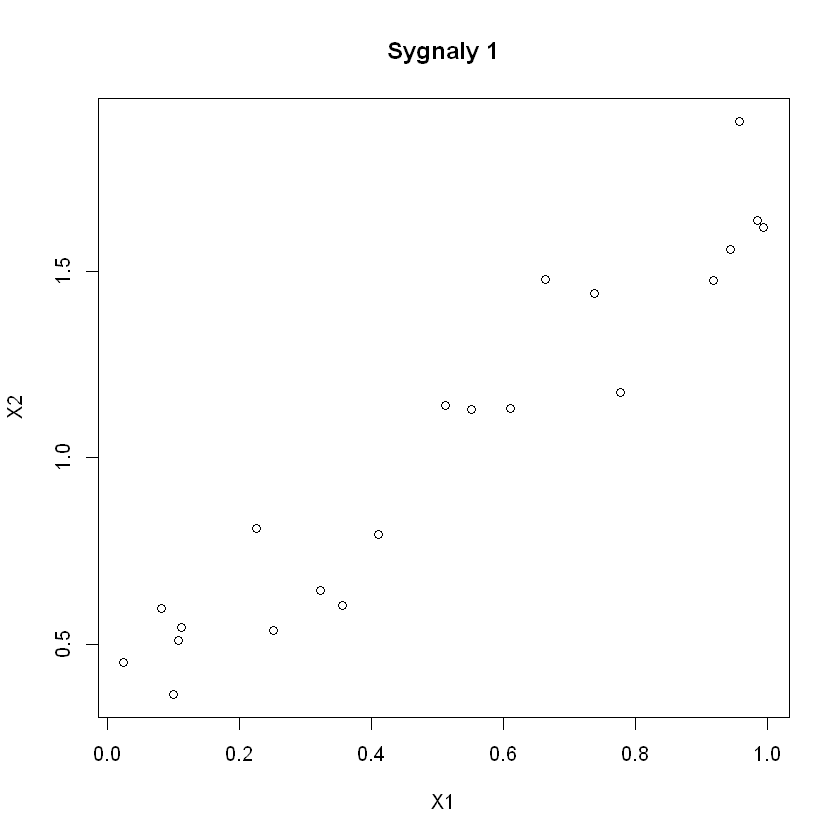

In [6]:
 plot(x2 ~ x1, main="Sygnaly 1", xlab="X1", ylab="X2" ) 

Powstaje pytanie czy wartości sygnałów są ze sobą powiązane - innymi słowy czy są skorelowane? Aby to sprawdzić możemy policzyć pewien punkt odniesienia (wartość średnią) i dla każdego `t` sprawdzić, po której stronie wartości średniej znajduje się wartość sygnału. Jeżeli dla dwóch sygnałów znak będzie taki sam, to ich iloczyn będzie dodatni, w przeciwnym przypadku ujemny.

Wykonaj poniższy kod, aby zdefiniować funkcję `plotWithMeans` pozwalającą na umieszczanie na wykresie informacji o przebiegach (w czasie) i wartościach średnich sygnałów.

In [7]:
plotWithMeans <- function(t, x1, x2){
  min <- min(x1, x2)
  max <- max(x1,x2)
  plot(x1 ~ t, ylim=c(min, max), type="o", col="red", ylab="value")
  abline(h=mean(x1), col="red")
  lines(x2 ~ t, col="green",type="o")
  abline(h=mean(x2), col="green")
  legend('topright', c("x1", "x2", "E(x1)", "E(x2)"), lty=1, col=c('red', 'green', 'red',' green'), bty='n', cex=.75)
}

Korzystając z funkcji `plotWithMeans` stwórz wykres wartości sygnału w zależności od czasu z naniesionymi wartościami średnimi sygnałów.

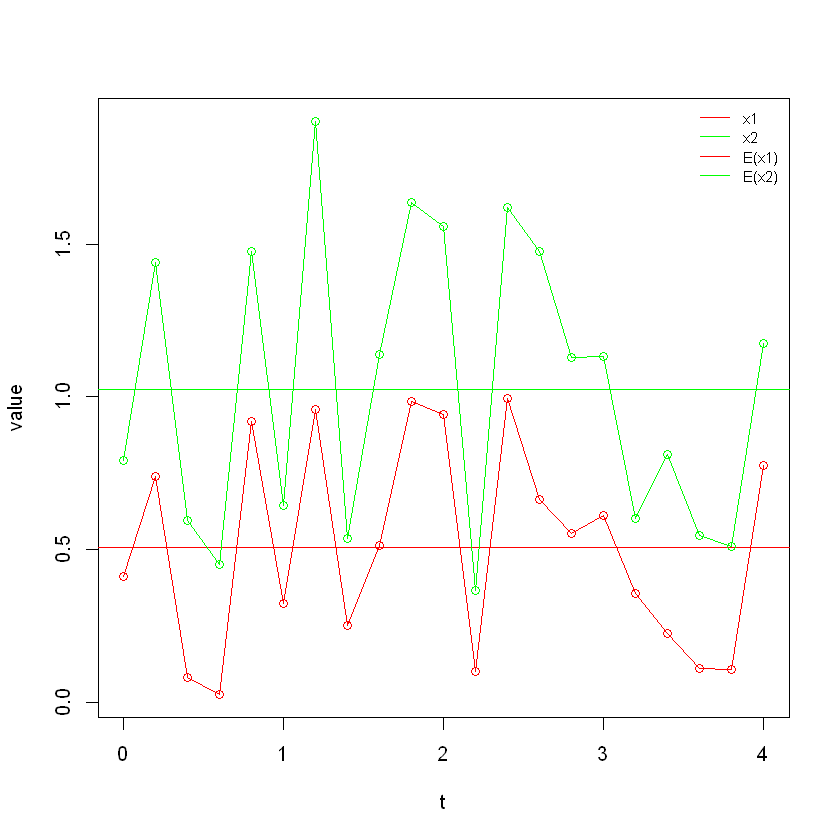

In [8]:
plotWithMeans(t, x1, x2)

Oblicz wartości średnie sygnałów `x1` i `x2`.

In [15]:
ex1 <- mean(x1)
ex2 <- mean(x2)
print(paste("Średnia x1: ", mean(x1)))
print(paste("Średnia x2: ", mean(x2)))

[1] "Średnia x1:  0.507283548525135"
[1] "Średnia x2:  1.02564122139232"


Oblicz iloczyny odchyleń wartości sygnałów od średnich `(x1-ex1)*(x2-ex2)`.

In [17]:
iloczyn_odchylen <- (x1 - ex1)*(x2 - ex2)
iloczyn_odchylen

[1] 0.0223648333 0.0958556891 0.1821426233 0.2763409780 0.1846814967
 [6] 0.0704817895 0.3947068577 0.1251382424 0.0006288255 0.2921413189
[11] 0.2318753304 0.2686807522 0.2889554815 0.0709211024 0.0045959295
[16] 0.0109053443 0.0639382581 0.0600569995 0.1895388663 0.2052978617
[21] 0.0401836800

Uśredniając takie iloczyny otrzymujemy kowariancję dwóch sygnałów. Oblicz kowariancję (z próby) dla `x1` i `x2`. Zweryfikuj poprawność obliczeń korzystając z wbudowanej funkcji cov.

In [19]:
kowariancja <- sum(iloczyn_odchylen)/(length(iloczyn_odchylen) - 1) # wzór z pdf-a na estymowanie kowariancji z próbki
kowariancja
cov(x1, x2)

[1] 0.1539716

[1] 0.1539716

Kowariancja jest zależna od wartości bezwględnych. Jej podzielenie przez iloczyn odchyleń standardowych normuje wartość współczynnika do przedziału od -1 do 1 - jest to korelacja. Oblicz wartość współczynnika korelacji $\frac{cov(x1, x2)}{sd(x1)\cdot sd(x2)}$.

In [21]:
wspolczynnik_korelacji <- kowariancja/(sd(x1)*sd(x2))
wspolczynnik_korelacji

[1] 0.9562197

[1] 0.9562197

Na podstawie wykonanych wcześniej poleceń uzupełnij funkcję `analyzeCorr`, która przyjmie jako argumenty `t`, `x1`, `x2` i tytuł (`title`), stworzy wykres rozrzutu i wykres zależności sygnałów od czasu wraz z średnimi (wykresy powinny być wyświetlone obok siebie) i zwróci wartość współczynnika korelacji dla `x1` i `x2`. Do wykreślenia wykresów obok siebie możesz skorzystać z polecenia `par(mfrow=c(1,2))`.

In [23]:
analyzeCor <- function(t, x1, x2, title){
    # Ustawiamy dwa wykresy obok siebie
    prev  <- par(mfrow=c(1,2))
    # 1. wykres rozrzutu 
    plot(x2 ~ x1, xlab="X1", ylab="X2", main=title)
    # 2. wkres plotWithMeans
    plotWithMeans(t, x1, x2)
    # Przywracamy poprzednie ustawienia
    par(prev)
    # Wyznaczamy kowariancję i korelację, zwracamy tę ostatnią
    ex1 <- mean(x1)
    ex2 <- mean(x2)
    odchylenia <- (x1 - ex1)*(x2 - ex2)
    kowariancja <- sum(odchylenia)/(length(odchylenia) - 1)
    korelacja <- kowariancja/(sd(x1)*sd(x2))
    return(korelacja)
}

Sprawdzić działanie funkcji `analyzeCorr`.

[1] 0.9562197

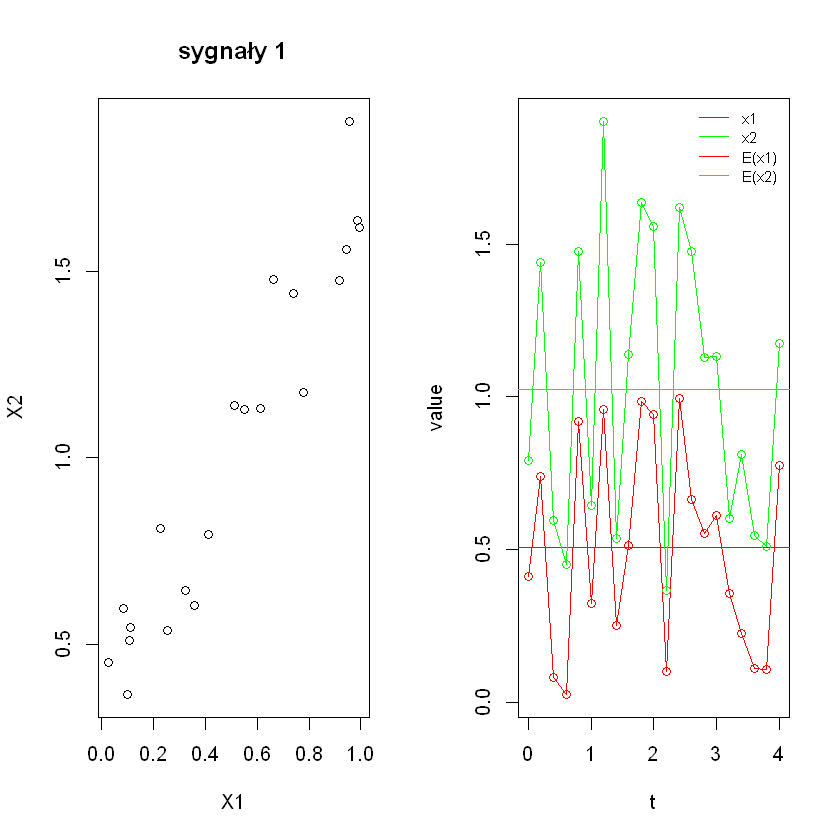

In [24]:
cor  <- analyzeCor(t, x1, x2, "sygnały 1")
cor

Za pomocą funkcji `analyzeCor` przeanalizuj wszystkie pary sygnałów wykorzystując poniższą pętlę.

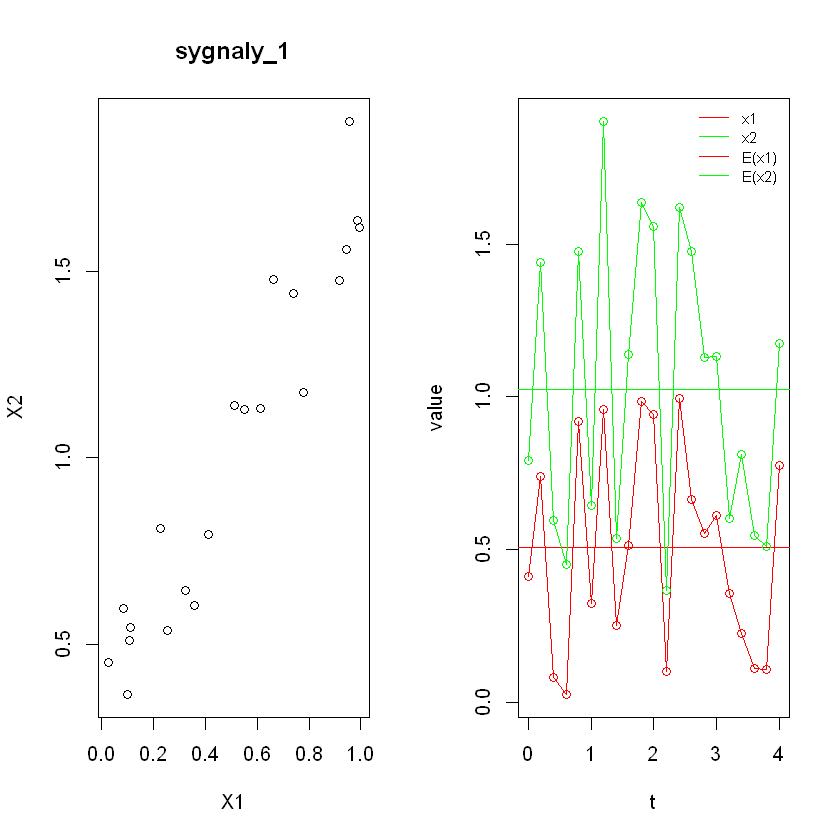

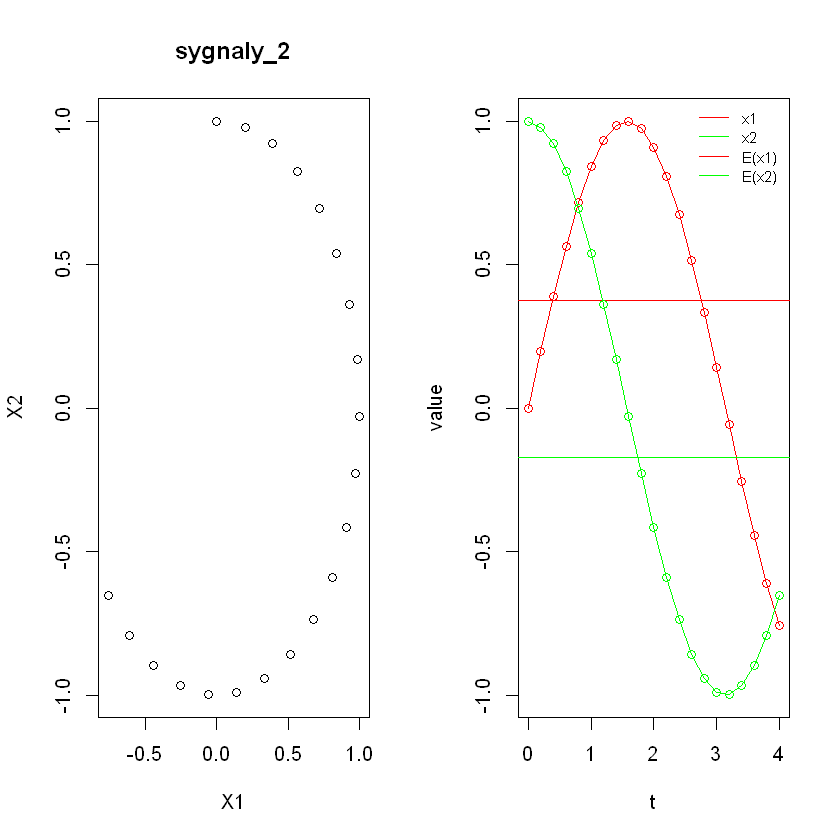

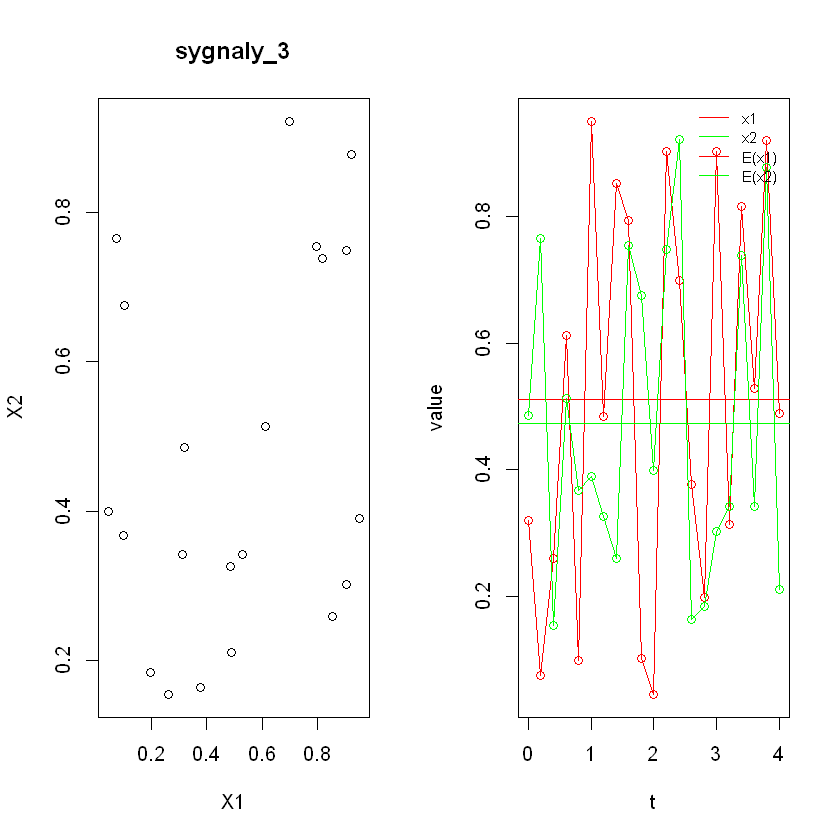

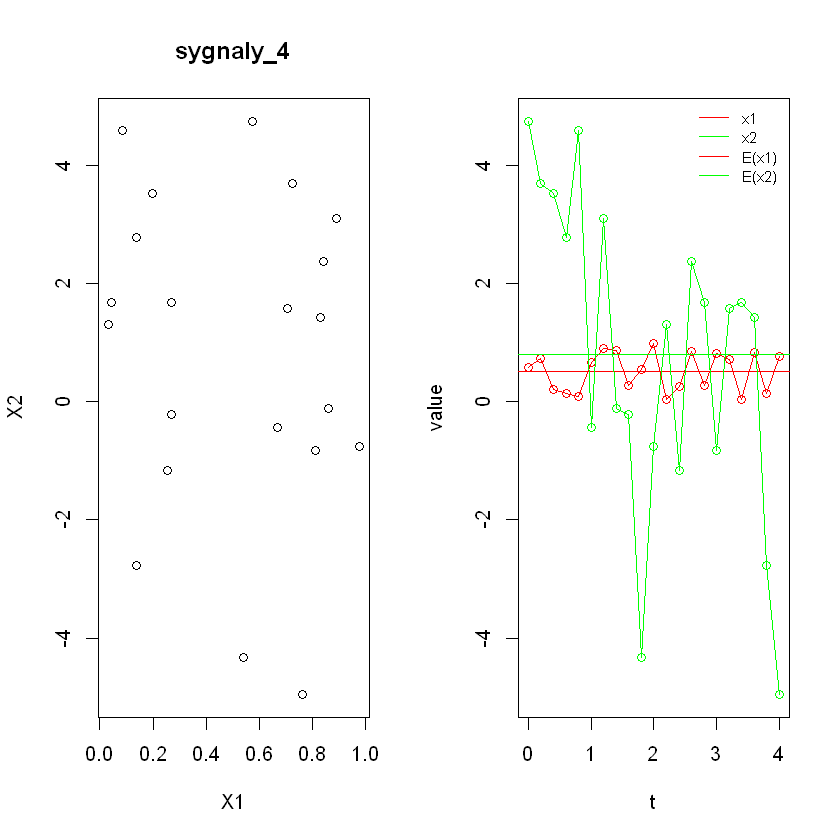

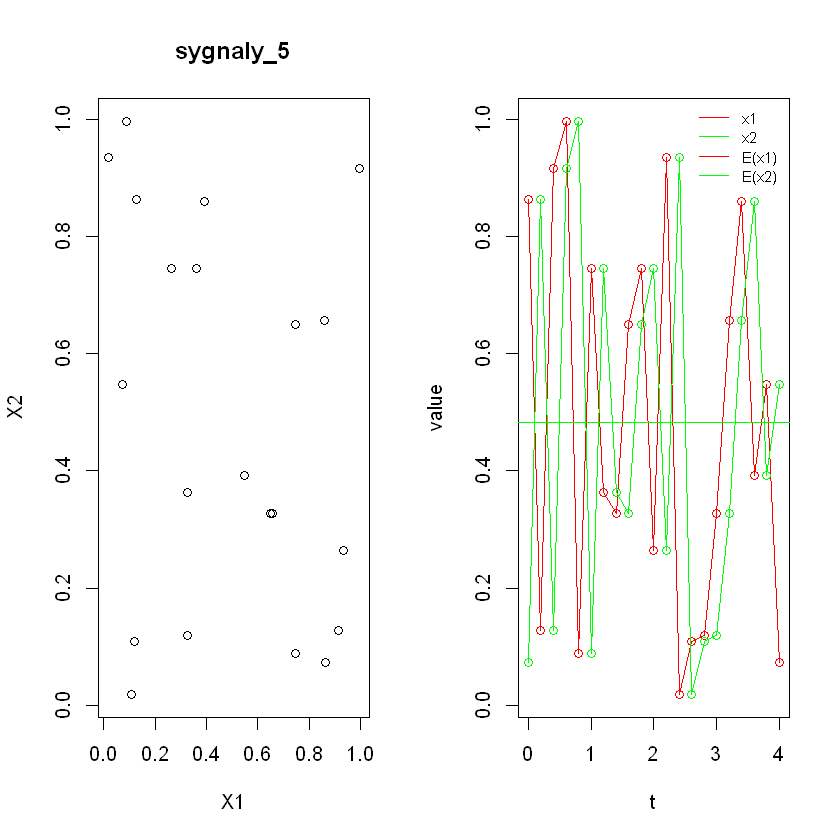

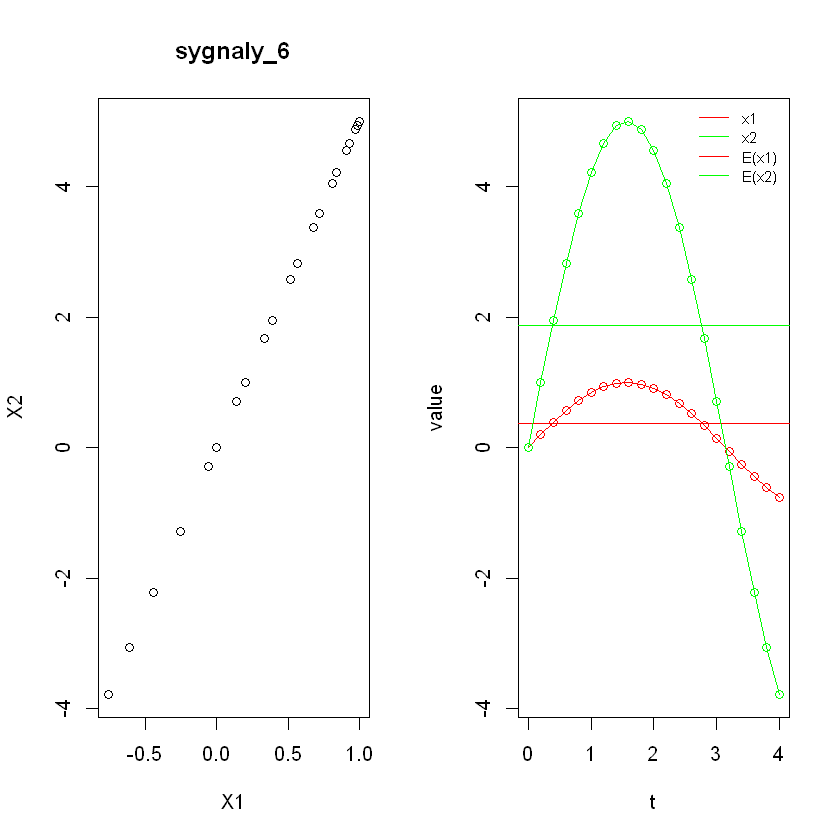

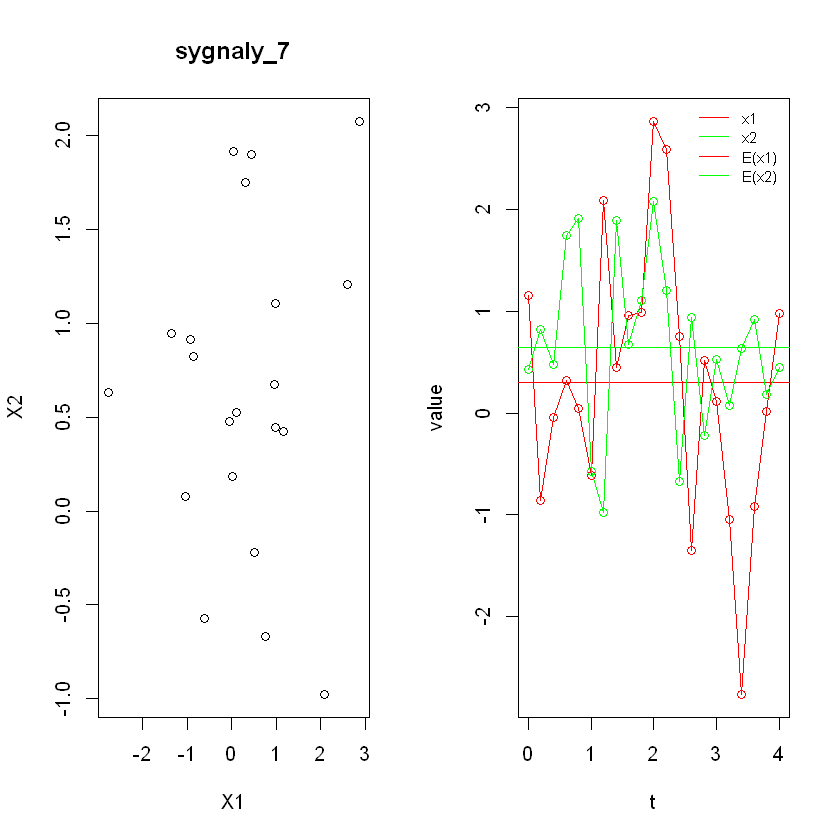

In [25]:
cor  <- vector(length = 7)
names(cor)  <- paste("sygnaly", 1:7, sep="_")
for (name in names(cor)){
  signals <- eval(as.name(name))
  cor[name] <- analyzeCor(signals$t, signals$x1, signals$x2, name)
}

A następnie wyświetl współczynniki korelacji dla poszczególnych par sygnałów (zmnienna `cor`).

In [26]:
cor

sygnaly_1   sygnaly_2   sygnaly_3   sygnaly_4   sygnaly_5   sygnaly_6 
 0.95621966  0.36126352  0.29159400 -0.15191725 -0.25056472  1.00000000 
  sygnaly_7 
 0.09999146

Porównaj powyższe wyniki z wartościami uzykanymi za pomocą funkcji wbudowanej `cor`.

In [28]:
cor  <- vector(length = 7)
names(cor)  <- paste("sygnaly", 1:7, sep="_")
for (name in names(cor)){
  signals <- eval(as.name(name))
  cor[name] <- cor(signals$x1, signals$x2)
}
cor

sygnaly_1   sygnaly_2   sygnaly_3   sygnaly_4   sygnaly_5   sygnaly_6 
 0.95621966  0.36126352  0.29159400 -0.15191725 -0.25056472  1.00000000 
  sygnaly_7 
 0.09999146

### Ćwiczenie 2: Wyznaczanie współczynników modelu regresji

W ćwiczeniu tym wyznaczymy współczynniki w modelu regresji stosując metodę najmnieszych kwadratów.

Podobnie jak poprzednio, zaczniemy od przygotowania danych. Wykonaj poniższy kod, aby przygotować dane do ćwiczenia.

In [29]:
regresja <- read.csv(url("http://www.cs.put.poznan.pl/swilk/siad/8-cw2.csv"), sep=";")

Ramka zawiera trzy kolumny, `x`, `yp=f(x)`  i `y=f(x)+epsilon`. Postaramy się wyestymować parametry `a` i `b`, tak aby jak najlepiej przybliżyć wartość `y`. Pierwsze podejście będzie polegać na ręcznym dopasowaniu wartości `a^` i `b^`, tak, aby suma różnic kwadratów była jak najmniejsza. 

Uzupełnij definicję funkcji `plotReg`, która wykreśla `yp`, `y` oraz `y^=a^*x+b^` i zwraca wartość sumy kwadratów różnic `(y^-y)^2`.

In [30]:
plotReg <- function(reg, at, bt){
    # Oblicz y^=a^*x+b^ (yt)
    yt <- at*reg$x + bt
    # Oblicz sumę (y^-y)^2:
    suma <- sum((yt - reg$y)^2)
  
    plot(reg$yp ~ reg$x, t="l", col="red", xlab="x", ylab="")
    points(reg$y ~ reg$x, col="blue")
    lines(yt ~ reg$x, t="l", col="green")
  
    # Funkcja powinna zwracać sumę kwadratów różnic:
    return(suma)
}

Spróbuj dopasować wartości `a^` i `b^` korzystając ze zdefiniowanej powyżej funkcji.

[1] 27.70193

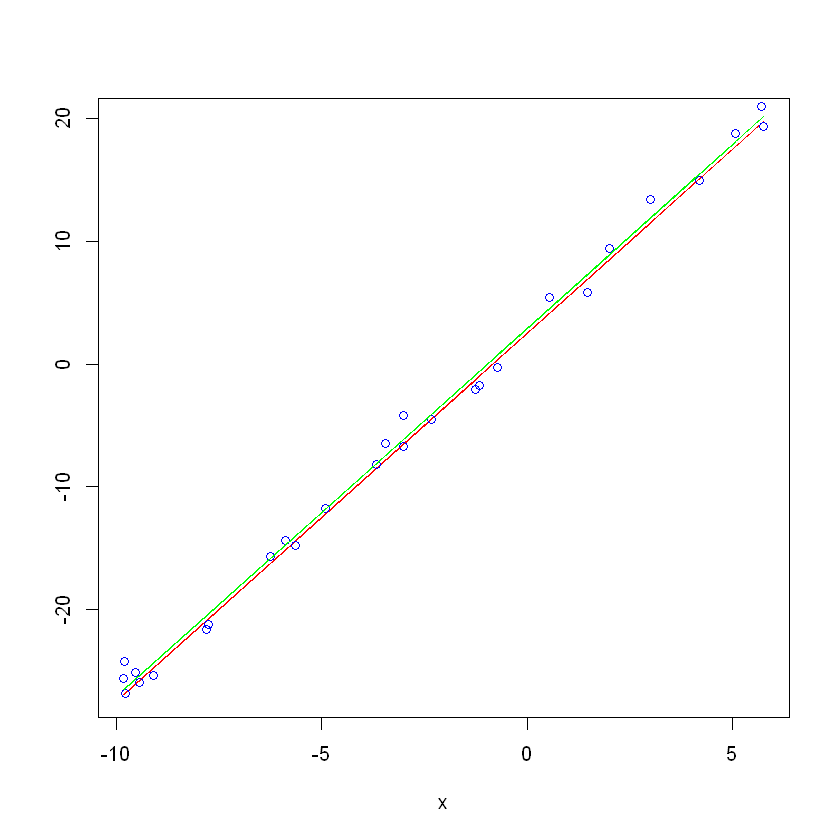

In [45]:
plotReg(regresja, 3, 2.9) #początkowe at = 3, bt = 2.7 wartosci zmodyfikowano po otrzymaniu rezultatów z funkcji model

Następnie wykorzystamy funkcję `lm`. Pierwszym argumentem tej metody jest `formula`, którą zdefinijemy jako `y~x`, drugim jest `data=regresja`. Otrzymany model regresji zapisz do zmiennej `model`.

In [43]:
model <- lm(y~x, regresja)


Call:
lm(formula = y ~ x, data = regresja)

Coefficients:
(Intercept)            x  
      2.913        3.001  


Korzystając ze zmiennej model odczytaj 'a^' i 'b^'.

In [46]:
model
# a = 3.001 (wspolczynnik przy X)
# b = 1.913


Call:
lm(formula = y ~ x, data = regresja)

Coefficients:
(Intercept)            x  
      2.913        3.001  


Obszerniejsze wyniki można uzyskać korzystając z funkcji `summary`.

In [47]:
summary(model)


Call:
lm(formula = y ~ x, data = regresja)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4594 -0.8644 -0.2456  0.7622  2.2902 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.91253    0.22896   12.72 1.14e-12 ***
x            3.00143    0.03873   77.50  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.032 on 26 degrees of freedom
Multiple R-squared:  0.9957,	Adjusted R-squared:  0.9955 
F-statistic:  6006 on 1 and 26 DF,  p-value: < 2.2e-16


### Ćwiczenie 3: Testowanie istotności statystycznej korelacji

W tym ćwiczeniu sprawdzimy, czy korelacja między zmiennymi jest statystycznie istotna. W tym celu skorzystamy ze statystyki *t*.

Zwyczajowo już zaczynamy od załadowania danych wykonyjąc poniższy kod.

In [48]:
dzieci <- read.csv(url("http://www.cs.put.poznan.pl/swilk/siad/8-cw3.csv"), sep=";")

Dane te zawierają informację o wieku w latach (`x`) i wzroście w cm (`y`) dla 15-osobowej grupy wylosowanej z populacji dzieci i młodzieży. Wyświetl zawartości ramki `dzieci`.

In [49]:
dzieci

x,y
7.0,120
8.0,122
9.0,125
10.0,131
11.0,135
11.5,140
12.0,142
13.0,145
14.0,150
15.0,154


Korzystajac z funkcji `plot` utwórz wykres rozrzutu dla tych danych. Opisz odpowiednio osie wykresu.

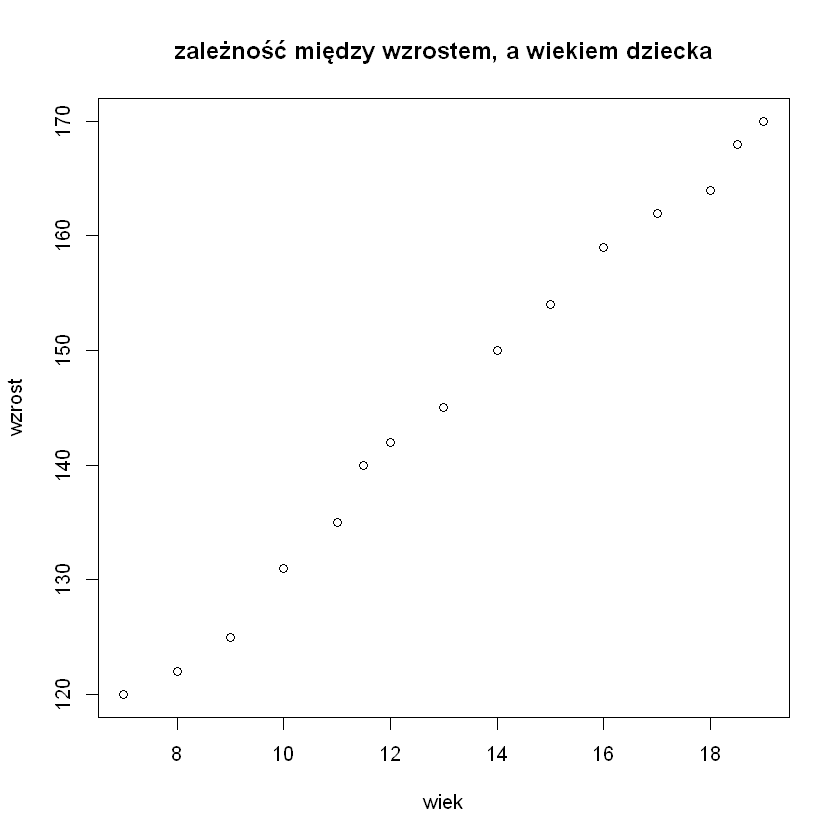

In [51]:
plot(dzieci$x, dzieci$y, main="zależność między wzrostem, a wiekiem dziecka", xlab="wiek", ylab="wzrost")

Oblicz średnie i odchylenia standardowe obu zmiennych oraz liczbę obserwacji.

In [55]:
ewiek <- mean(dzieci$x)
ewzrost <- mean(dzieci$y)
odch_wiek <- sd(dzieci$x)
odch_wzrost <-sd(dzieci$y)
liczba <- nrow(dzieci)

Oblicz samodzielnie współczynnik korelacji korzystając ze wzoru $\frac{cov(x, y)}{sd(x) \cdot sd(y)}$.

In [58]:
kowariancja_dzieci <- sum((dzieci$x - ewiek)*(dzieci$y - ewzrost))/(liczba -1)
korelacja_dzieci <- kowariancja_dzieci/(odch_wiek*odch_wzrost)
korelacja_dzieci

[1] 0.9968424

Oblicz także współczynnik korelacji korzystając z funkcji `cor`.

In [59]:
cor(dzieci$x, dzieci$y)

[1] 0.9968424

Aby zweryfikować hipotezę mówiącą, że współczynnik korelacji jest niezerowy (test dwustronny), oblicz wartość statystyki $t=\frac{r}{\sqrt{1-r^2}}\cdot \sqrt{n-2}$, gdzie $r$ to współczynnik korelacji dla próby.

In [61]:
test_t <- korelacja_dzieci/sqrt(1- korelacja_dzieci^2) * sqrt(liczba - 2)
test_t

[1] 45.26349

Oblicz p-wartość dla wyznaczonej statystyki pamiętając, że mamy do czynienia z testem dwustronnym. Jaki będzie wynik testowania hipotez (zakładając poziom istotności równy 0.05)?

In [63]:
2*pt(test_t, lower.tail = FALSE, df=liczba-2)
cor.test(dzieci$x, dzieci$y)

[1] 1.086091e-15


	Pearson's product-moment correlation

data:  dzieci$x and dzieci$y
t = 45.263, df = 13, p-value = 1.086e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9902420 0.9989805
sample estimates:
      cor 
0.9968424 


Wyznacz model regresji korzystając z funkcji `lm`.

In [64]:
model_dzieci <- lm(y ~ x, data = dzieci)
model_dzieci


Call:
lm(formula = y ~ x, data = dzieci)

Coefficients:
(Intercept)            x  
     88.689        4.305  


Utwórz wykres modelu regresji korzystając z funkcji `abline` (wcześniej narysuj ponownie wykres rozrzutu). W jakich warunkach uzyskany model może mieć zastosowanie?

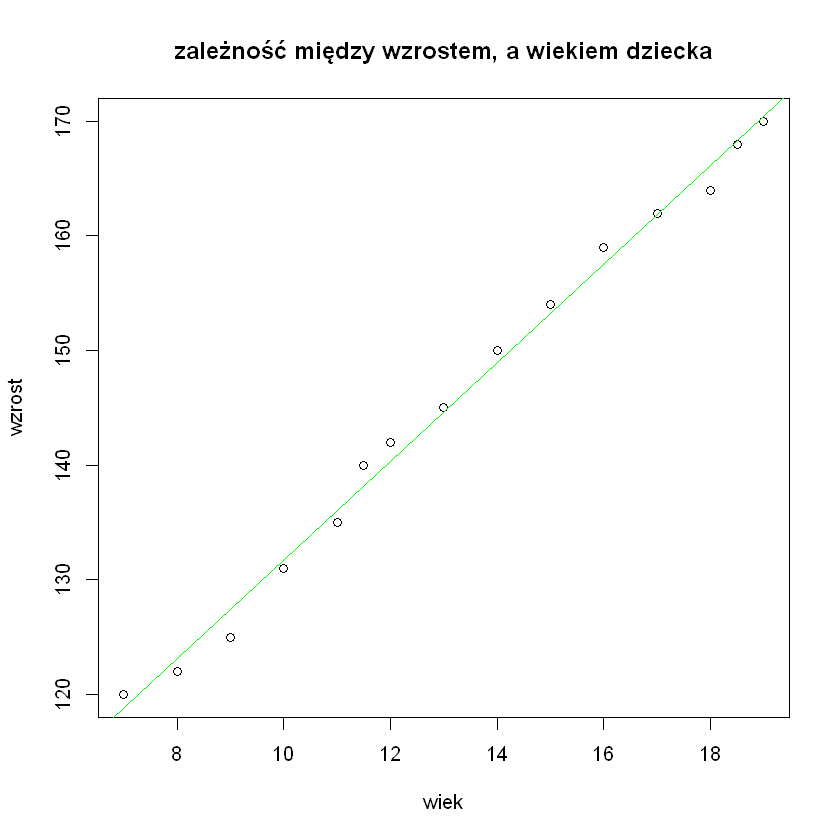

In [69]:
plot(dzieci$x, dzieci$y, main="zależność między wzrostem, a wiekiem dziecka", xlab="wiek", ylab="wzrost")
abline(model_dzieci, col="green")